# OFFENSIVE CONTENT DETECTION ON SOCIAL MEDIA

Any published or broadcast content (such as articles, photographs, films, or websites) that is likely to be upsetting, insulting, or objectionable to some or most people is known as offensive content.The idea of this project is to analyze a twitter dataset and use it to train a Machine Learning model which can then use that model to predict weather the text or tweet is Offensive or Not.

## Importing some of the required ML librarires

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords



# model building libaries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## Inserting dataset with OFFENSIVE AND NON OFFENSIVE information

In [2]:
train = pd.read_csv(r'C:\Users\Tanishka Rana\.vscode\extensions\train_tweet.csv')

#USING THE TEST DATASET FOR TESTING INPUTS ONLY
test = pd.read_csv(r'C:\Users\Tanishka Rana\.vscode\extensions\test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


## INSPECTING THE TRAIN DATASET

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
#checking out the NON OFFENSIVE comments from the train set

train[train['label'] == 0].head(30)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
# checking out the OFFENSIVE OR HATE TWEETS comments from the train set 

train[train['label'] == 1].head(30)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [7]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()

# create a function to compute the NON-OFFENSIVE,OFFENSIVE analysis

def getAnalysis(RES):
   
    if RES ==0:
        return 'non offensive'
    else:
        return 'offensive'
    
train['Analysis']=train['label'].apply(getAnalysis)    

train.head(15)

,id,label,tweet,len,Analysis
0,1,0,@user when a father is dysfunctional and is s...,102,non offensive
1,2,0,@user @user thanks for #lyft credit i can't us...,122,non offensive
2,3,0,bihday your majesty,21,non offensive
3,4,0,#model i love u take with u all the time in ...,86,non offensive
4,5,0,factsguide: society now #motivation,39,non offensive
5,6,0,[2/2] huge fan fare and big talking before the...,116,non offensive
6,7,0,@user camping tomorrow @user @user @user @use...,74,non offensive
7,8,0,the next school year is the year for exams.ð...,143,non offensive
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,non offensive
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,non offensive


Text(0.5, 1.0, '0 : Non offensive 1: offensive ')

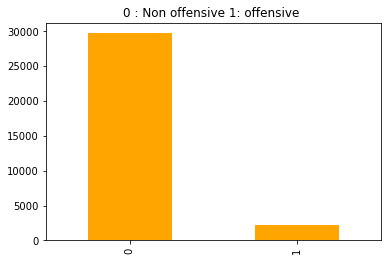

In [8]:
#plotting graph offensive vs non offensive tweets
train['label'].value_counts().plot.bar(color = 'ORANGE', figsize = (6, 4))
plt.title("0 : Non offensive 1: offensive ")

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

In [10]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Text(0.5, 1.0, 'RED : Train set \n BROWN : Test set ')

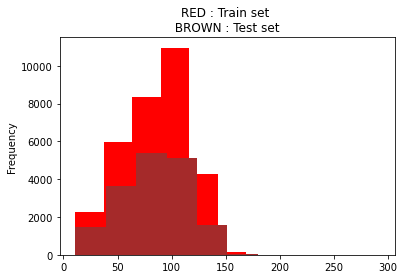

In [11]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'red', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'brown', figsize = (6, 4))
plt.title("RED : Train set \n BROWN : Test set ")

# Preprocessing and Cleaning the Tweets
To make it workable, there is a lot of processing that needs to happen. The preprocessing of the text data is an essential step as it makes the raw text ready for mining, i.e., it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

###  1: Remove User Handles (@user) and create new column 'clean_tweet'

In [12]:
train['clean_tweet'] = train['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
train.head()

,id,label,tweet,len,Analysis,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,non offensive,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,non offensive,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,21,non offensive,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,non offensive,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,39,non offensive,factsguide: society now #motivation


### 2: Removing punctuations, special characters and unnecessary characters

In [13]:
train['hashtags'] =train['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
train.head()

,id,label,tweet,len,Analysis,clean_tweet,hashtags
0,1,0,@user when a father is dysfunctional and is s...,102,non offensive,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,122,non offensive,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,21,non offensive,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,86,non offensive,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,39,non offensive,factsguide: society now #motivation,#motivation


In [14]:
train['clean_tweet'] = train['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word.startswith('#')]))
train.head()

,id,label,tweet,len,Analysis,clean_tweet,hashtags
0,1,0,@user when a father is dysfunctional and is s...,102,non offensive,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,122,non offensive,thanks for credit i can't use cause they don't...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,21,non offensive,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,86,non offensive,i love u take with u all the time in urð±!!!...,#model
4,5,0,factsguide: society now #motivation,39,non offensive,factsguide: society now,#motivation


In [15]:
train['clean_tweet'] = train['clean_tweet'].str.replace("[^a-zA-Z#*]"," ")
train['clean_tweet'] = train['clean_tweet'].str.replace("RT"," ")
train['clean_tweet'] = train['clean_tweet'].str.replace(r"#(\W+)"," ")
train.head()

,id,label,tweet,len,Analysis,clean_tweet,hashtags
0,1,0,@user when a father is dysfunctional and is s...,102,non offensive,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,122,non offensive,thanks for credit i can t use cause they don t...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,21,non offensive,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,86,non offensive,i love u take with u all the time in ur ...,#model
4,5,0,factsguide: society now #motivation,39,non offensive,factsguide society now,#motivation


In [16]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Tanishka
[nltk_data]     Rana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)


In [18]:
train['clean_tweet'] = train_corpus
train.head() 

,id,label,tweet,len,Analysis,clean_tweet,hashtags
0,1,0,@user when a father is dysfunctional and is s...,102,non offensive,user father dysfunct selfish drag kid dysfunct...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,122,non offensive,user user thank lyft credit use caus offer whe...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,21,non offensive,bihday majesti,
3,4,0,#model i love u take with u all the time in ...,86,non offensive,model love u take u time ur,#model
4,5,0,factsguide: society now #motivation,39,non offensive,factsguid societi motiv,#motivation


In [19]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [20]:
# extracting hashtags from non offensive or neutral tweets
HT_nonoffensive = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from offensive tweets
HT_offensive = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_nonoffensive = sum(HT_nonoffensive,[])
HT_offensive = sum(HT_offensive,[])

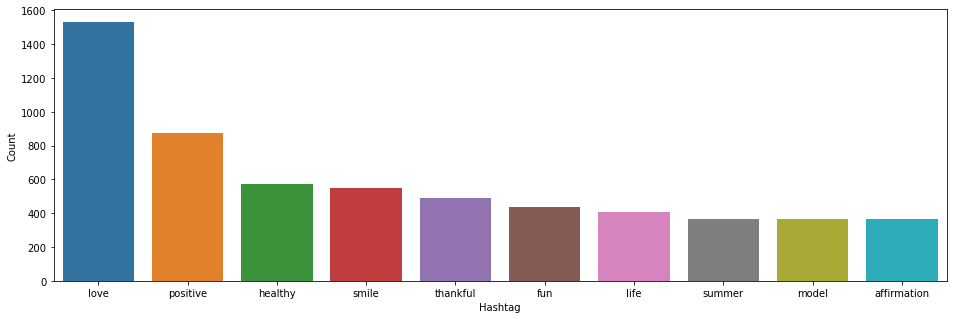

In [21]:
a = nltk.FreqDist(HT_nonoffensive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

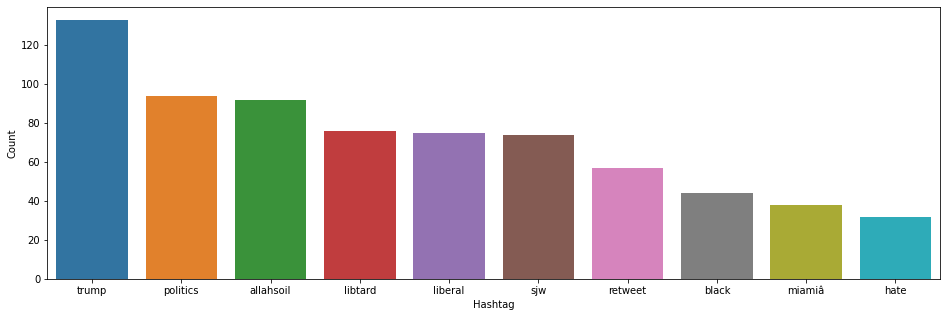

In [22]:
a = nltk.FreqDist(HT_offensive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Visualization using wordcloud

Text(0.5, 1.0, 'TWEET WORDS IN DATASET')

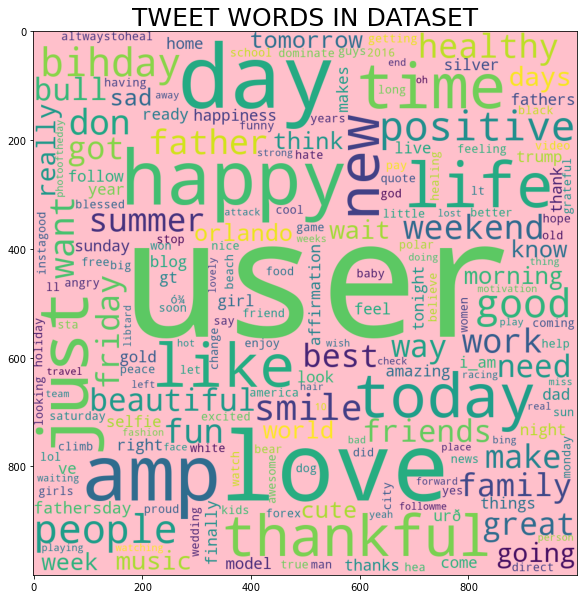

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'pink', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("TWEET WORDS IN DATASET", fontsize = 25)

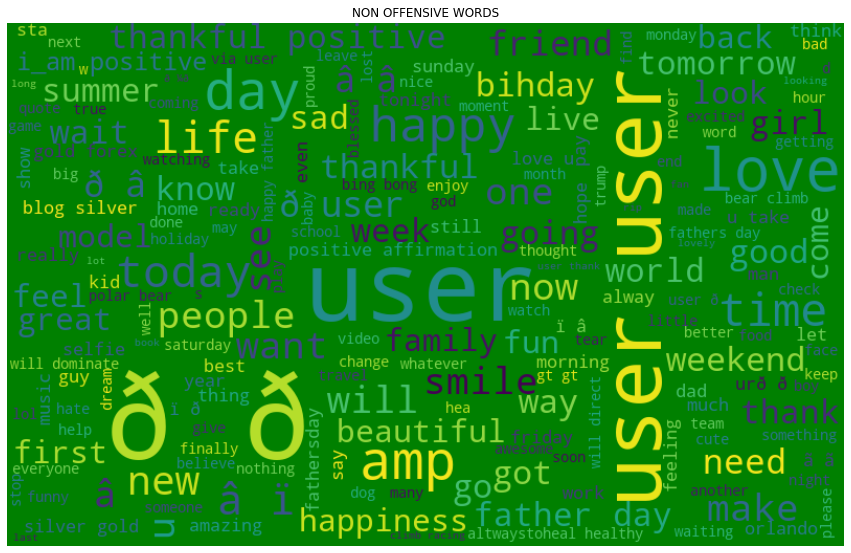

In [24]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('NON OFFENSIVE WORDS')
plt.show()

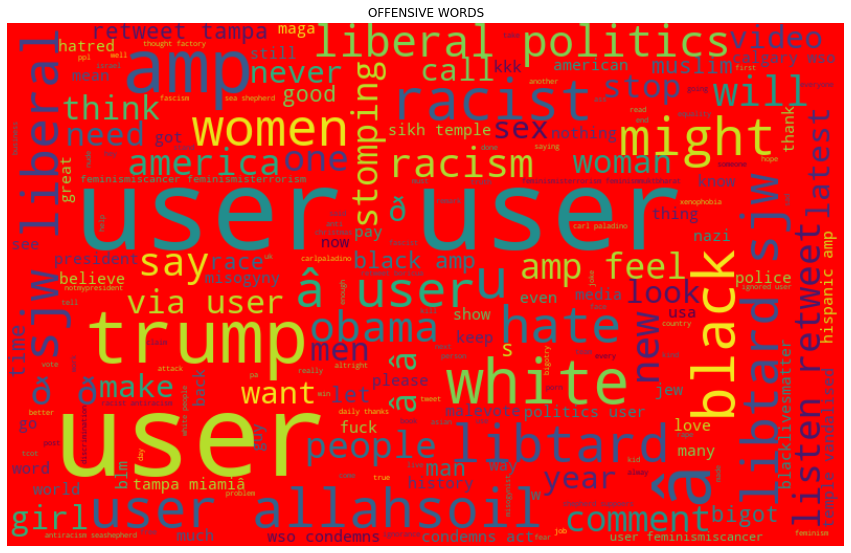

In [25]:
offensive_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'red', width=800, height=500, random_state = 0, max_font_size = 110).generate(offensive_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('OFFENSIVE WORDS')
plt.show()

Columns tweet and hashtags are not of any importance when it comes to training the Model. So, we'll drop these columns and export the training data in a new csv file: cleaned_traindata.csv

In [26]:
# DROPPING hashtags column AS IT WON'T BE OF ANY USE IN MODEL TRAINING
train = train.drop(columns=['tweet','hashtags'],axis=1)
train.to_csv('cleaned_traindata.csv',index=False)

# Model Training
The aim here is to create and train a Machine Learning Model which can take data as input and predict whether a tweet is Offensive or Not.
Inorder to achieve the above task we'll use the Python library sklearn which has tools like TfidVectorizer, train_test_split, LogisticRegression and DecisionTreeClassifier to assist in fast production of a Machine Learning Model.

In [27]:
df = pd.read_csv('./cleaned_traindata.csv')
x = df['clean_tweet']
y = df['label']
df.head()

,id,label,len,Analysis,clean_tweet
0,1,0,102,non offensive,user father dysfunct selfish drag kid dysfunct...
1,2,0,122,non offensive,user user thank lyft credit use caus offer whe...
2,3,0,21,non offensive,bihday majesti
3,4,0,86,non offensive,model love u take u time ur
4,5,0,39,non offensive,factsguid societi motiv


In [28]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23971,)
(7991,)
(23971,)
(7991,)


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [30]:
x_train = vectorizer.fit_transform(x_train.values.astype('U'))
x_test = vectorizer.transform(x_test.values.astype('U'))

# 1. Logistic Regression
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR =LogisticRegression() 
LR.fit(x_train,y_train)

LogisticRegression()

In [33]:
pred_lr=LR.predict(x_test)

In [34]:
LR.score(x_test, y_test)

0.9490677011638093

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7432
           1       0.90      0.31      0.46       559

    accuracy                           0.95      7991
   macro avg       0.93      0.65      0.71      7991
weighted avg       0.95      0.95      0.94      7991



# 2. Decision Tree Classification
Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
pred_dt = DT.predict(x_test)

In [39]:
DT.score(x_test, y_test)

0.9455637592291328

In [40]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7432
           1       0.62      0.55      0.59       559

    accuracy                           0.95      7991
   macro avg       0.80      0.76      0.78      7991
weighted avg       0.94      0.95      0.94      7991



# TESTING

In [41]:
X=train['clean_tweet']
tfidf=TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X=tfidf.fit_transform(X)
y=train['label']

In [42]:
X.shape

(31962, 10000)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [44]:
X_train.shape, X_test.shape

((23971, 10000), (7991, 10000))

#### USING DECISION TREE CLASSIFIER AND LOGISTIC REGRESSION 

In [45]:
df=DecisionTreeClassifier()
df.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
df1=LogisticRegression()
df1.fit(X_train, y_train)

LogisticRegression()

#### GIVE INPUT

In [47]:
text ='pick jeff sessions scrubs racism from record...even tho he once argued this is a felony #trumpsamerica'

In [48]:

vec= tfidf.transform([text])

text = text.replace("[^a-zA-Z#*]"," ")
text = text.replace("RT","")
text = text.replace(r"#(\W+)","")

DecisionTreeClassifier

In [49]:
result=df.predict(vec)
print (result)

if result == [0]:
   print("non offensive content")
else:
   print("offensive content")
pred_dt = df.predict(X_test)
df.score(X_test, y_test)

[1]
offensive content


0.9440620698285571

Logistic Regression

In [51]:
result=df1.predict(vec)
print (result)

if result == [0]:
   print("non offensive content")
else:
   print("offensive content")
pred_dt = df1.predict(X_test)
df1.score(X_test, y_test)

[1]
offensive content


0.9510699536979101